In [ ]:
from mantid.simpleapi import *           # importing Mantid algorithms
import mantid.plots                      # allow plotting for workspaces
import matplotlib.pyplot as plt          # matplotlib plotting
from matplotlib.colors import LogNorm    # logscale for colorbar

In [9]:
%matplotlib notebook

## Running a simple script

In [16]:
Load(Filename='/SNS/HYS/IPTS-8020/nexus/HYS_104287.nxs.h5',OutputWorkspace='data')
SumSpectra(InputWorkspace='data',OutputWorkspace='summed')
Rebin(InputWorkspace='summed',OutputWorkspace='rebinned', Params='10')

EventWorkspace
Title: MnO,  20 meV, 120hz,  P horiz along Q,  Flip OFF s2-35
Histograms: 1
Bins: 1667
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts
Distribution: False
Instrument: HYSPEC (2011-Jul-20 to 2100-Jan-31)Instrument from: /SNS/HYS/IPTS-8020/nexus/HYS_104287.nxs.h5

Parameters from: /SNS/software/miniconda2/envs/py3/instrument/HYSPEC_Parameters.xml
Run start: 2016-Mar-19 19:13:36
Run end:  2016-Mar-19 21:03:57

Events: 616179

Output is an event workspace, with 1 histogram and 1667 bins. Here is how to plot it from a script

<IPython.core.display.Javascript object>


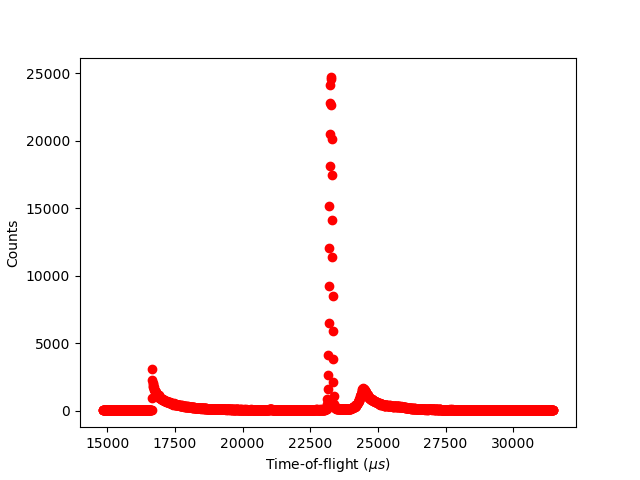

<Container object of 3 artists>

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})  # must use the 'mantid' projection
ax.errorbar(mtd['rebinned'],fmt='ro')                       # mtd['name'] is a workspace handle (discussed below)

## Workspace handles

* Algorithms that take input workspaces can use the workspace name
* If one needs to access the underlying properties of the workspace in python, one needs a workspace hadle
* There are two ways to get hold of a handle:

    ** `handle = mtd['wsname']`



In [4]:
w=LoadNXSPE('/SNS/HYS/IPTS-8020/shared/autoreduce/4pixel/HYS_104287_4pixel.nxspe')

In [5]:
mde=ConvertToMD(w,QDimensions='|Q|',dEAnalysisMode='Direct')

In [6]:
mdh=BinMD(mde,AxisAligned=True,AlignedDim0='|Q|,0,4,100',AlignedDim1='DeltaE,-20,17,100')

In [7]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

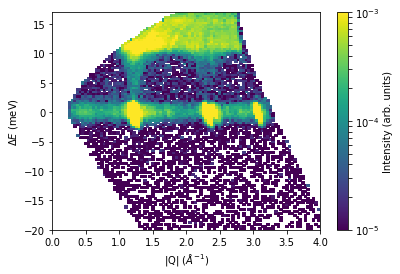

In [8]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(mdh, norm=LogNorm(vmin=1e-5,vmax=1e-3))
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)') #add text to colorbar